In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score


In [7]:
 data = pd.read_csv("emails.csv")
 data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
data = data.drop('Email No.', axis=1)

In [11]:
data.shape

(5172, 3001)

In [13]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [17]:
data['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [19]:
 X = data.drop('Prediction', axis = 1)
 y = data['Prediction']

In [21]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
 y_pred = neigh.predict(X_test)

In [29]:
 neigh.score(X_train, y_train)
 neigh.score(X_test, y_test)

0.8859903381642512

In [31]:
 print("Confusion Matrix: ")
 cm = confusion_matrix(y_test, y_pred)
 cm


Confusion Matrix: 


array([[683,  50],
       [ 68, 234]], dtype=int64)

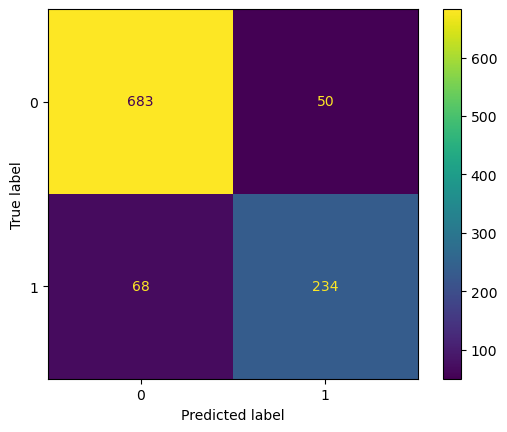

In [35]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       733
           1       0.82      0.77      0.80       302

    accuracy                           0.89      1035
   macro avg       0.87      0.85      0.86      1035
weighted avg       0.88      0.89      0.88      1035



In [47]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8859903381642512

In [53]:
 print("precision_score: ")
 precision_score(y_test, y_pred)

precision_score: 


0.823943661971831

In [55]:
 print("Error: ")
 1-accuracy_score(y_test, y_pred)

Error: 


0.11400966183574879

In [57]:
 from sklearn.svm import SVC
 SVM = SVC(gamma = 'auto')
 SVM.fit(X_train, y_train)

SVC(gamma='auto')

In [58]:
 y_pred = SVM.predict(X_test)

In [59]:
 SVM.score(X_train, y_train)
 SVM.score(X_test, y_test)

0.9101449275362319

In [66]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[706,  27],
       [ 66, 236]], dtype=int64)

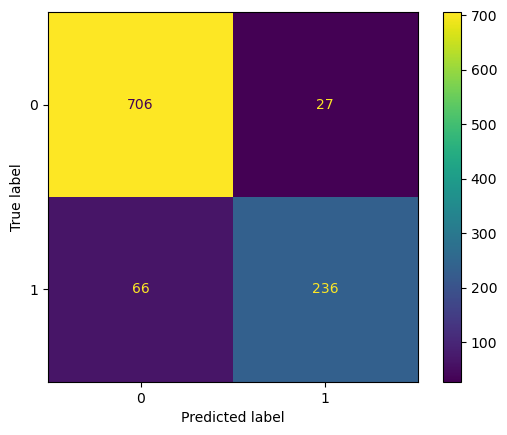

In [70]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [72]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       733
           1       0.90      0.78      0.84       302

    accuracy                           0.91      1035
   macro avg       0.91      0.87      0.89      1035
weighted avg       0.91      0.91      0.91      1035

